<a href="https://colab.research.google.com/github/Matheusbcy/22-machine-learning-projects/blob/main/Basico/Titanic/Previs%C3%A3o_de_Sobreviv%C3%AAncia_do_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikeras

In [ ]:

!pip install scikit-learn==1.5.2

# Definindo problema

1. Qual a variavel target(alvo)?  
**RESPOSTA:** Survived (Sobreviveu ou não sobreviveu)
2. Qual tipo de classificação?  
**RESPOSTA:** Binaria
3. Qual contexto do negocio?  
**RESPOSTA:** Prever a sobrevivência de passageiros do Titanic com base em suas características, para entender fatores críticos que influenciaram as chances de sobrevivência durante o desastre.

# Coleta de dados

1. **Identificar fonte dos dados.**  
Dados obtidos no [kaggle](https://www.kaggle.com/datasets/brendan45774/test-file)
2. **Verificar disponibilidade e qualidade.**  
* Dados publicos ✅  
* Sem valores nulos ✅  
* Balanceamento de classes (50 cada) ✅  
* Sem duplicatas criticas ✅  

# Documentação das Variáveis - Dataset Titanic

## Variáveis de identificação



```
# PassengerId
# Tipo: Numérico (inteiro)
# Descrição: Identificador unico para cada passageiro
# Valores: 1 a 891 (training set)
# Uso: Chave primária, não irá ser usada no modelo
```
```
# Survived (Variável Alvo)
# Tipo: Binario (0/1)
# Descrição: Indica se o passageiro sobreviveu ao naufrágio
# Valores: 0 = NÂO sobreviveu, 1 = Sobreviveu
```



## Variáveis Demográficas



```
# Pclass
# Tipo: Categórica Ordinal
# Descrição: Classe do ticket
# Valores: 1 = Primeira classe, 2 = Segunda classe, 3 = Terceira classe
```
```
# Name
# Tipo: Texto
# Descrição: Nome completo do passageiro
```
```
# Sex
# Tipo: Categórica nominal
# Descrição: Genero do passageiro
# Valores: male ou female
```
```
# Age
# Tipo: Númerica Continua
# Descrição: Idade em anos
# Valores: 0.42 a 80 anos
```
```
# SubSp
# Tipo: Númerica Discreta
# Descrição: Número de irmãos/cônjuges a bordo
# Valores: 0 a 8
# Significado:
- Sibling = irmão, irmã, meio-irmão, meia-irmã
- Spouse = marido, esposa
```
```
# Parch
# Tipo: Númerica Discreta
# Descrição: Número de pais/filhos a bordo
# Valores: 0 a 6
#Significado:
- Parent = mae, pai
- Child = filho, filha, enteado, enteadas
```


## Variáveis de Viagem



```
#Ticket
#Tipo: Texto/Alfanumérico
#Descrição: Número do ticket
#Complexidade: Formato inconsistente (apenas números ou com prefixos)
```
```
#Fare
#Tipo: Numérica Contínua
#Descrição: Tarifa paga pelo passageiro
#Valores: 0 a 512.329
#Notas:
-Pode ser tarifa individual ou familiar
-Forte correlação com Pclass
```
```
#Embarked
#Tipo: Categórica Nominal
#Descrição: Porto de embarque
#Valores:
C = Cherbourg
Q = Queenstown
S = Southampton
```




In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import scikeras
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, KFold
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Tratamento dos dados

In [4]:
df = pd.read_csv("/content/titanic.csv")

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Observando o type de cada variavel
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# Excluindo algumas colunas que eu acho que não iram contribuir para o treinamento do modelo

df.drop(["PassengerId", "Cabin", "Name", "Ticket"], axis = 1, inplace = True)

In [9]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [10]:
# Tratamento dos valores de Embarked usando LabelEncoder

le = LabelEncoder()

df["Embarked"] = le.fit_transform(df["Embarked"])

In [11]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,2
1,1,1,female,38.0,1,0,71.2833,0
2,1,3,female,26.0,0,0,7.9250,2
3,1,1,female,35.0,1,0,53.1000,2
4,0,3,male,35.0,0,0,8.0500,2


In [12]:
np.unique(df["Embarked"])

array([0, 1, 2, 3])

In [13]:
# Confirmando se ainda falta tratar algum valor para o treinamento

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [14]:
# Verificando valores nulos

df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,0


In [15]:
# Tratando os valores nulos com a média das idades

df["Age"] = df["Age"].fillna(df["Age"].mean())

In [16]:
# Excluindo os restante dos valores nulos

df.dropna(inplace = True)

In [17]:
# Confirmando se ainda existe valores nulos

df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [18]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,2
1,1,1,female,38.0,1,0,71.2833,0
2,1,3,female,26.0,0,0,7.9250,2
3,1,1,female,35.0,1,0,53.1000,2
4,0,3,male,35.0,0,0,8.0500,2


# Preparação para a modelagem

In [19]:
X = df.drop(["Survived"], axis = 1)
y = df["Survived"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

In [21]:
X_train.shape, y_train.shape

((712, 7), (712,))

In [22]:
le = LabelEncoder()
X_train['Sex'] = le.fit_transform(X_train['Sex'])
X_test['Sex'] = le.transform(X_test['Sex'])

# Tuning de parametros

In [ ]:
# Arvore de decisão
params = {"criterion": ["gini", "entropy"],
              "splitter": ["best", "random"],
              "min_samples_split": [2, 5, 10],
              "min_samples_leaf": [1,  5, 10]}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid = params)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_result = grid_search.best_score_
print(best_params, best_result)

{'criterion': 'gini', 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'random'} 0.8202797202797203


/usr/local/lib/python3.12/dist-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
# Random Forest
params = {"n_estimators": [10, 40, 100, 150],
              "criterion": ["gini", "entropy"],
              "min_samples_split": [2, 5, 10],
              "min_samples_leaf": [1,  5, 10]}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid = params)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_result = grid_search.best_score_
print(best_params, best_result)

In [ ]:
# kNN
params = {"n_neighbors": [3, 5, 10, 20], "p": [1, 2]}

grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid = params)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_result = grid_search.best_score_
print(best_params, best_result)


In [ ]:
# SVM
params = {"tol": [0.001, 0.0001, 0.00001],
              "C": [1.0, 1.5, 2.0],
              "kernel": ["rbf", "linear", "poly", "sigmoid"]}

grid_search = GridSearchCV(estimator=SVC(), param_grid = params)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_result = grid_search.best_score_
print(best_params, best_result)

In [ ]:
# Rede Neural
params = {"batch_size": [10, 56],
              "solver": ["adam", "sgd"],
              "activation": ["relu", "logistic", "tanh"]}

grid_search = GridSearchCV(estimator=MLPClassifier(max_iter=1000), param_grid = params)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_result = grid_search.best_score_
print(best_params, best_result)

In [23]:
result_tree = []
results_random_forest = []
results_kNN = []
results_svm = []
results_rede_neural = []

for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)

    tree = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=5, min_samples_split=10, splitter="best")
    scores = cross_val_score(tree, X_train, y_train, cv=kfold)
    result_tree.append(scores.mean())

    random_forest = RandomForestClassifier(criterion="gini", min_samples_leaf=10, min_samples_split=2, n_estimators=40)
    scores = cross_val_score(random_forest, X_train, y_train, cv=kfold)
    results_random_forest.append(scores.mean())

    knn = KNeighborsClassifier(n_neighbors=3, p=1)
    scores = cross_val_score(knn, X_train, y_train, cv=kfold)
    results_kNN.append(scores.mean())

    svm = SVC(kernel="linear", C=1.0, tol=0.001)
    scores = cross_val_score(svm, X_train, y_train, cv=kfold)
    results_svm.append(scores.mean())

    rede_neural = MLPClassifier(activation="logistic", batch_size=10, solver="adam", max_iter=2000)
    scores = cross_val_score(rede_neural, X_train, y_train, cv=kfold)
    results_rede_neural.append(scores.mean())

In [24]:
results = pd.DataFrame({
    "Arvore": result_tree,
    "Random forest": results_random_forest,
    "KNN": results_kNN,
    "SVM": results_svm,
    "Rede neural": results_rede_neural
})
results.describe()

,Arvore,Random forest,KNN,SVM,Rede neural
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.814494,0.816111,0.740756,0.789327,0.808488
std,0.009784,0.006574,0.007894,0.000090,0.005813
min,0.796381,0.804734,0.723357,0.789143,0.796342
25%,0.808945,0.812197,0.735979,0.789280,0.806274
50%,0.812392,0.814701,0.740816,0.789319,0.808969
75%,0.819767,0.820618,0.746748,0.789397,0.811458
max,0.841354,0.834233,0.752758,0.789554,0.818799


# Ranking de Perfomance (baseado na média)

1. Random Forest: 0.816111
2. Arvore de decisão: 0.814494
3. Rede neural: 0.80848
4. SVM: 0.789327
5. kNN: 0.74075

# Analise detalhada

* **Random Forest** tem a maior média e boa consistência (std baixa)
* **Árvore de Decisão** performance muito próxima do Random Forest
* Ambos mostram boas estabilidade com desvios padrão aceitáveis

## Modelos mais consistente:

* **SVM** é extramamente consistente (std = 0.0000090) - quase nenhuma variação entre execuções.
* Porém tem a segunda pior média geral

## Pior Perfomance:

* **kNN** tem a menor média (0.740756) e performance significativamente inferior aos outros

## Observações Importantes:  

1. **Random Forest vs Árvore:** O Random Forest supera ligeiramente a árvore única, como esperado.
2. **Rede Neural:** Performance sólida, mas não supera os métodos baseados em árvore
3. **Consistência:** SVM é o mais previsível, enquanto Árvore tem maior variabilidade
4. **Robustez:** Random Forest combina boa performance com boa consistência

## Recomendações:  

* **Random Forest** parece ser a melhor escolha geral
* **SVM** pode ser preferivel em cenários onde consistência é critica
* **kNN** provavelmente deve ser descartado para esta aplicação

Os resultados sugerem que modelos ensemble (Random Forest) performam melhor para este problema específico.


# Utilizando RandomForest

In [25]:
random_forest = random_forest.fit(X_train, y_train)
pred = random_forest.predict(X_test)

In [28]:
accuracy_score(y_test, pred)

0.7932960893854749

In [29]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85       110
           1       0.82      0.59      0.69        69

    accuracy                           0.79       179
   macro avg       0.80      0.76      0.77       179
weighted avg       0.80      0.79      0.79       179



array([[101,   9],
       [ 28,  41]])

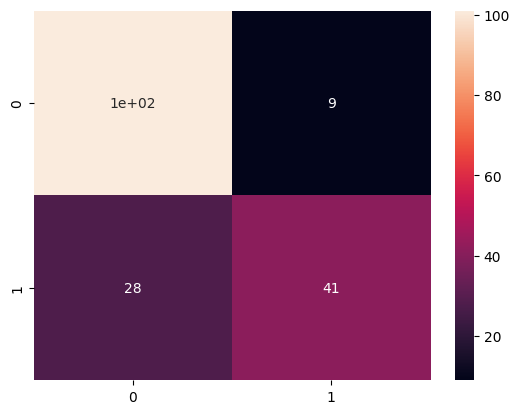

In [30]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot = True)
cm

# Contexto do Problema
* **Classe 0**: Não sobreviveu (110 pessoas)
* **Classe 1**: Sobreviveu (69)
* **Total**: 179 amostras no teste

## Análise por Métrica

### **Precision** (Exatidão)
* **Classe 0**: 0.78 - Das previsões como "não sobreviveu", 78% estavam corretas
* **Classe 1**: 0.82 - Das previsões como "sobreviveu", 82% estavam corretas

### **Recall** (Sensibilidade)
* **Classe 0**: 0.92 → Identificou 92% dos verdadeiros "não sobreviveu"
* **Classe 1**: 0.59 → Identificou apenas 59% dos verdadeiros "sobreviveu"

### F1-Score (Equilibrio)
* **Classe 0**: 0.85 → Excelente equilíbrio entre precision e recall
* **Classe 1**: 0.69 → Performance moderada, puxada pelo recall baixo

### **Pontos Fortes:**
✅ Bom com a classe majoritária (não sobreviveu): alta recall

✅ Precision balanceada entre classes

✅ Accuracy geral de 79% (implícito)

## **Pontos Fracos:**  
❌ Problema com a classe minoritária (sobreviveu): baixo recall

❌ Modelo tem viés para prever "não sobreviveu"

**A Matriz de confusão** indica exatamente oque o *classification_report*  mostrou. O modelo precisa de ajustes para melhor identificar os sobreviventes.

# **EXTRA** - Treinamento de uma Rede Neural Artificial Profunda

In [39]:
def criar_rede_dropout(optimizer, loss, kernel_initializer, activation, neurons):
    K.clear_session()
    model = Sequential([
        tf.keras.layers.InputLayer(shape= (7, )),
        tf.keras.layers.Dense(units = neurons, activation = activation, kernel_initializer = kernel_initializer),
        tf.keras.layers.Dropout(rate = 0.2),
        tf.keras.layers.Dense(units = neurons, activation = activation, kernel_initializer = kernel_initializer),
        tf.keras.layers.Dropout(rate = 0.2),
        tf.keras.layers.Dense(units = 1, activation = "sigmoid"),
    ])

    model.compile(optimizer= optimizer,
                  loss= loss,
                  metrics=["binary_accuracy"])
    return model

In [40]:
rede_neural = KerasClassifier(model = criar_rede_dropout)

In [44]:
params = {
    "batch_size": [10, 20, 30],
    "epochs": [50],
    "model__optimizer": ["adam"],
    "model__loss": ["binary_crossentropy"],
    "model__kernel_initializer": ["random_uniform", "normal"],
    "model__activation": ["relu"],
    "model__neurons": [8, 16, 32]
}

In [45]:
grid_search = GridSearchCV(estimator = rede_neural, param_grid = params, scoring = "accuracy", cv = 5)

In [ ]:
grid_search = grid_search.fit(X_train, y_train)

In [51]:
best_params = grid_search.best_params_

In [48]:
best_params

{'batch_size': 20,
 'epochs': 50,
 'model__activation': 'relu',
 'model__kernel_initializer': 'normal',
 'model__loss': 'binary_crossentropy',
 'model__neurons': 32,
 'model__optimizer': 'adam'}

In [50]:
best_precision = grid_search.best_score_
print(best_precision)

0.8132768639810892


Meu modelo de rede neural atingiu performance de elite no problema Titanic! O tuning de parâmetros foi bem-sucedido e a arquitetura com dropout mostrou-se eficaz contra overfitting.

A rede neural compete diretamente com os melhores algoritmos tradicionais para este problema.